## Loading Dataset

In [23]:
import pandas as pd 
df=pd.read_csv("heart.csv")

## Shape of Dataset

In [24]:
rows,columns=df.shape
print(rows,columns)

918 12


## Datatypes of COlumns

In [25]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [26]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Checking null Values

In [27]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##

In [28]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [29]:
print("=== Summary Statistics ===")
print(df.describe(include='all'))


=== Summary Statistics ===
               Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR Exerci

In [30]:
print("\nMode of categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].mode()[0]}")


Mode of categorical columns:
Sex: M
ChestPainType: ASY
RestingECG: Normal
ExerciseAngina: N
ST_Slope: Flat


In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

## Histogram to Show Distribution of Data

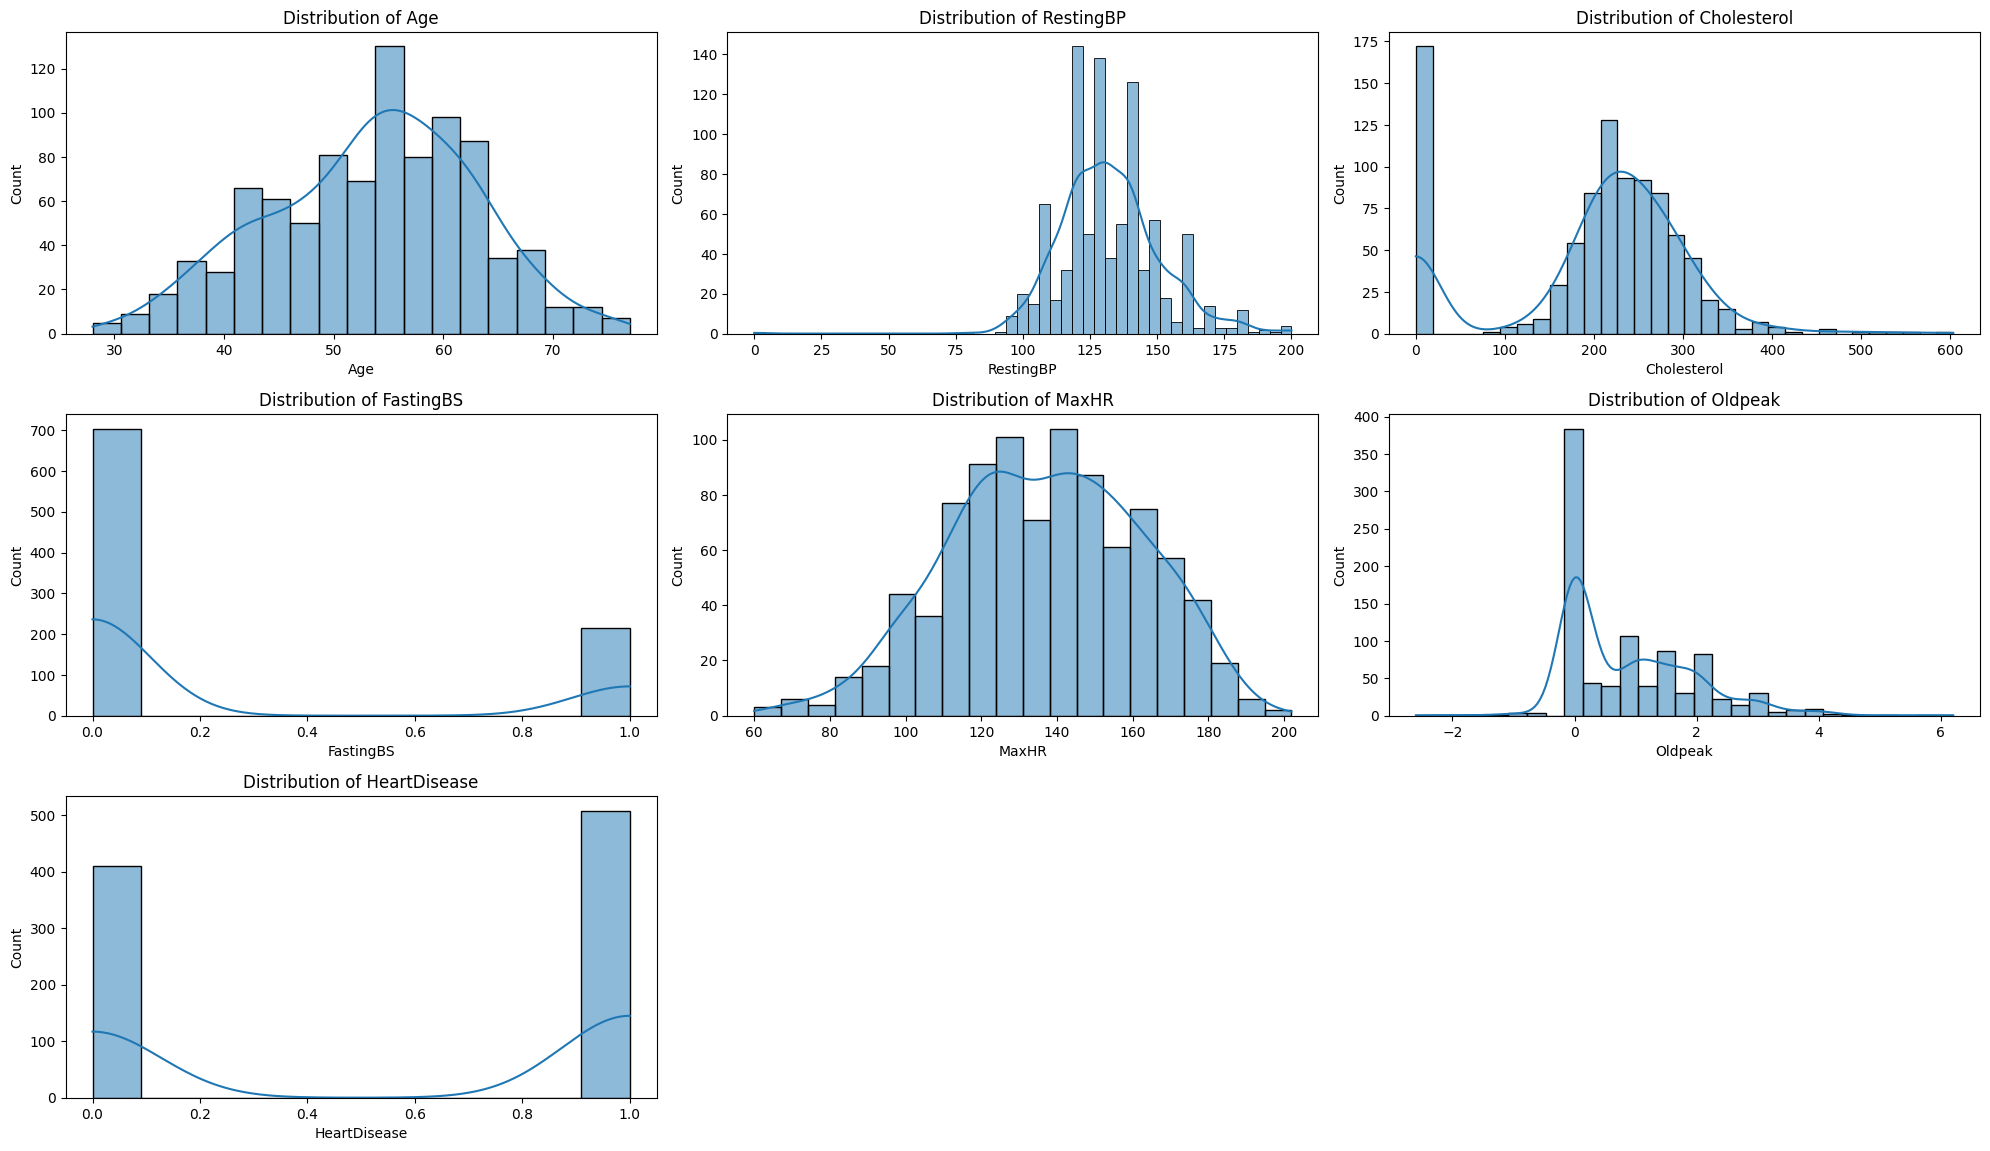

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



## BoxPlot of Numeric Features to Detect Outliers

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'RestingBP'),
  Text(3, 0, 'Cholesterol'),
  Text(4, 0, 'FastingBS'),
  Text(5, 0, 'MaxHR'),
  Text(6, 0, 'Oldpeak'),
  Text(7, 0, 'HeartDisease')])

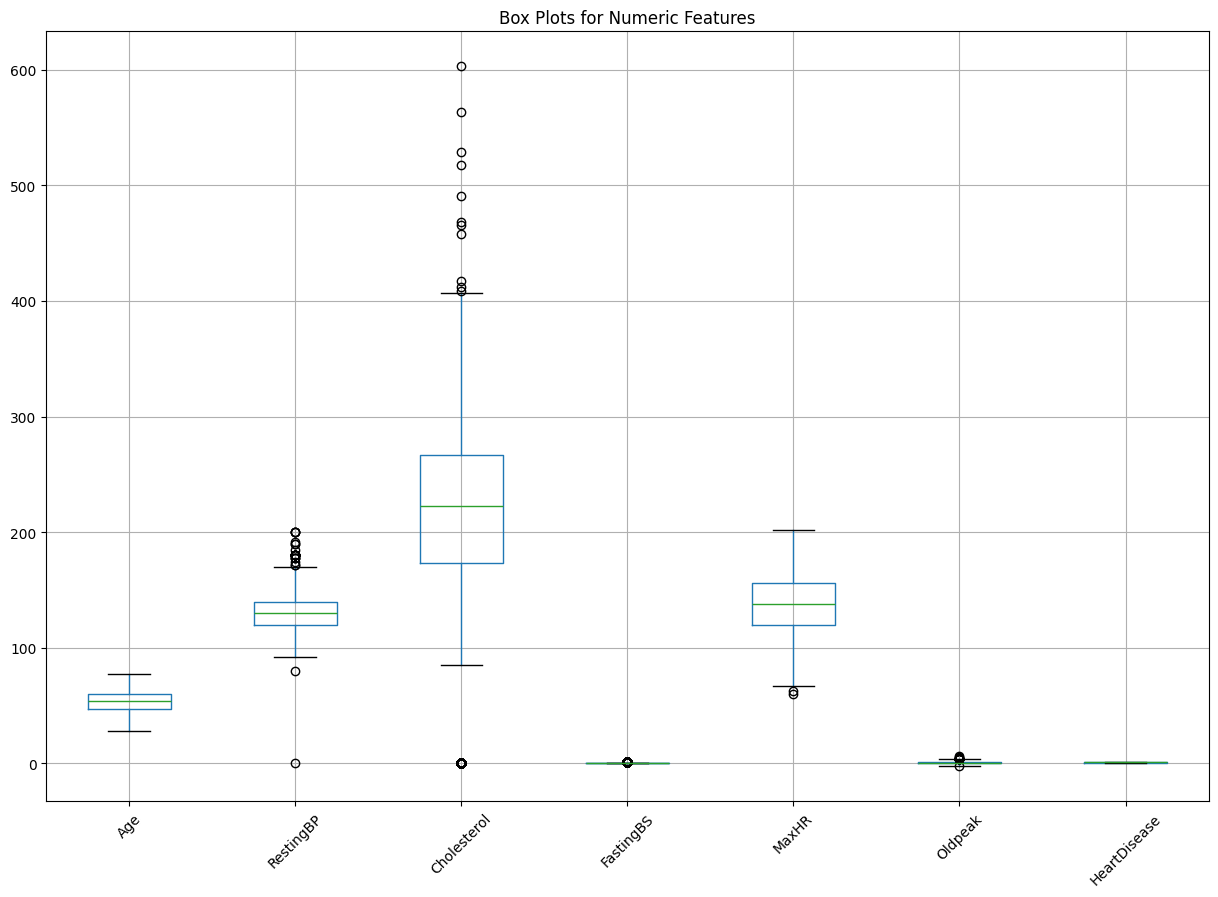

In [33]:
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.title('Box Plots for Numeric Features')
plt.xticks(rotation=45)


## Count plot of Categorical COlumns

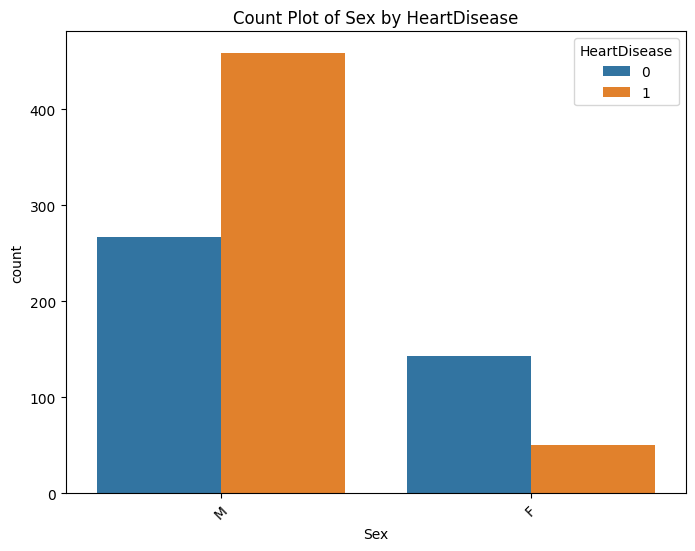

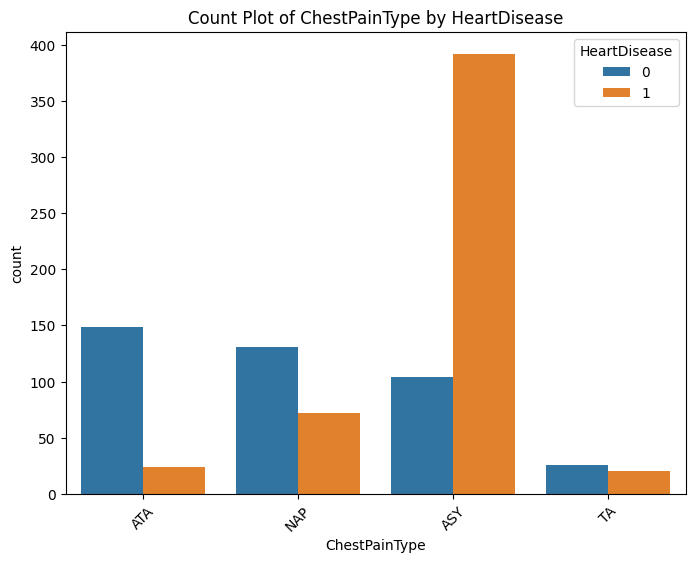

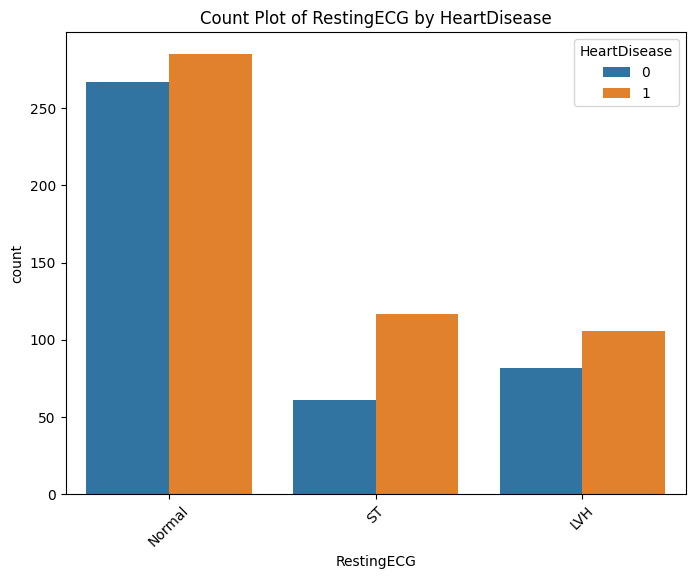

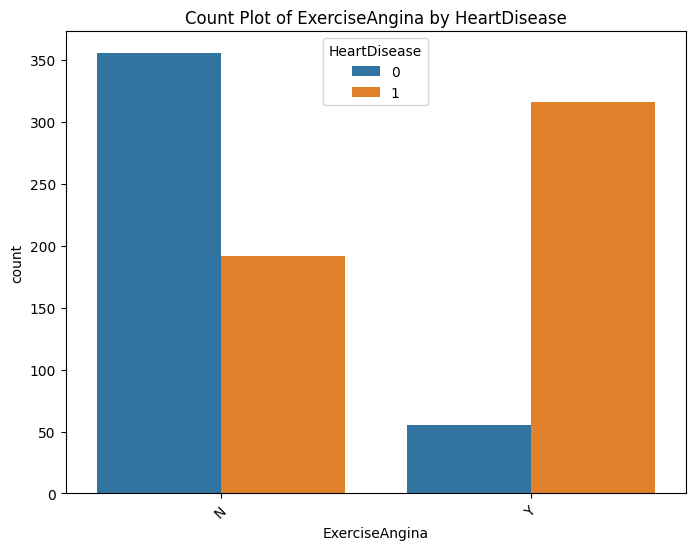

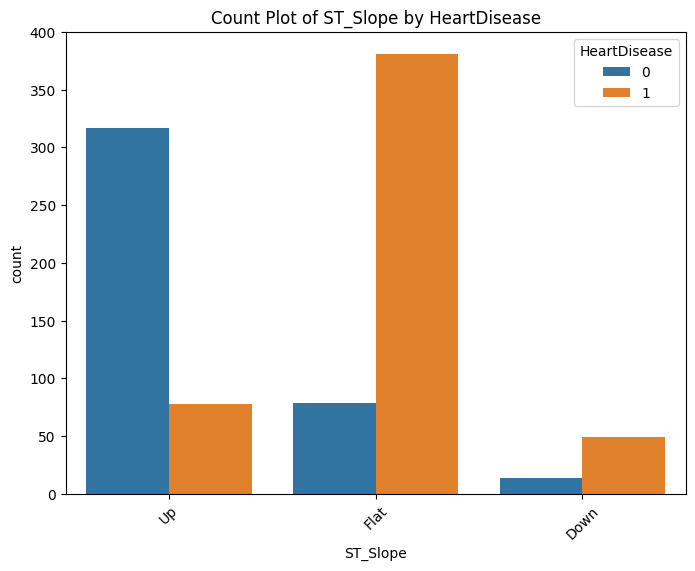

In [34]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f'Count Plot of {col} by HeartDisease')
    plt.xticks(rotation=45)

## Heatmap to show Correlation of Numeric Features

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

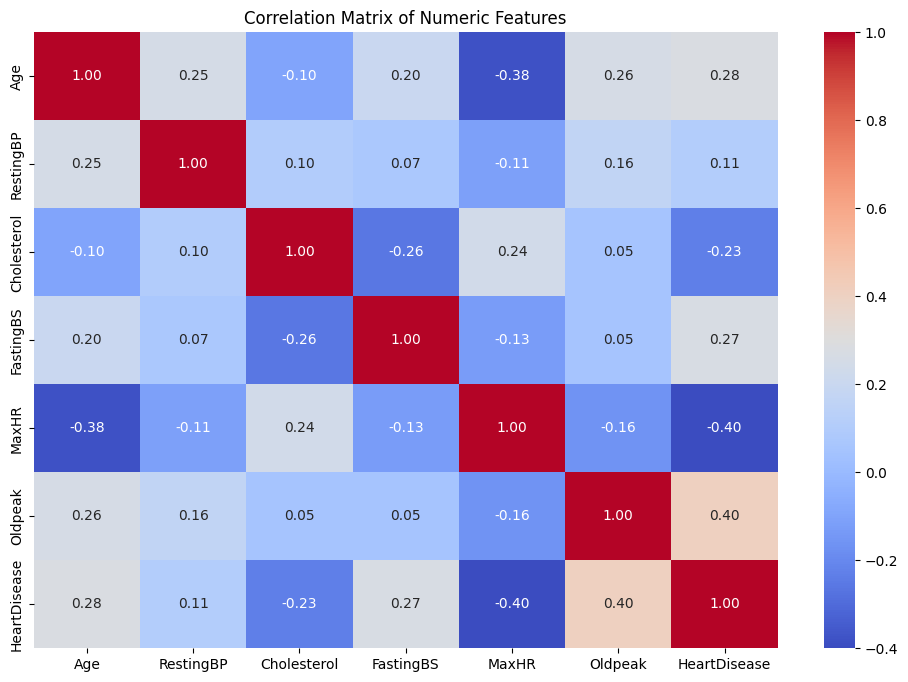

In [35]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')

## Grouped Aggregations

In [36]:
print("=== Grouped Aggregations by ChestPainType ===")
grouped = df.groupby('ChestPainType').agg({
    'Age': ['mean', 'median'],
    'RestingBP': ['mean', 'median'],
    'Cholesterol': ['mean', 'median'],
    'MaxHR': ['mean', 'median'],
    'HeartDisease': 'mean'
}).round(2)
print(grouped)

=== Grouped Aggregations by ChestPainType ===
                 Age        RestingBP        Cholesterol          MaxHR  \
                mean median      mean median        mean median    mean   
ChestPainType                                                             
ASY            54.96   56.0    133.23  130.0      186.65  220.5  128.48   
ATA            49.24   51.0    130.62  130.0      233.05  237.0  150.21   
NAP            53.31   53.0    130.96  130.0      197.44  218.0  143.24   
TA             54.83   59.0    136.41  140.0      207.07  229.0  147.89   

                     HeartDisease  
              median         mean  
ChestPainType                      
ASY            128.0         0.79  
ATA            152.0         0.14  
NAP            147.0         0.35  
TA             145.0         0.43  


## Scatter Plot for Avg vs MaxHR

Text(0.5, 1.0, 'Age vs MaxHR by HeartDisease')

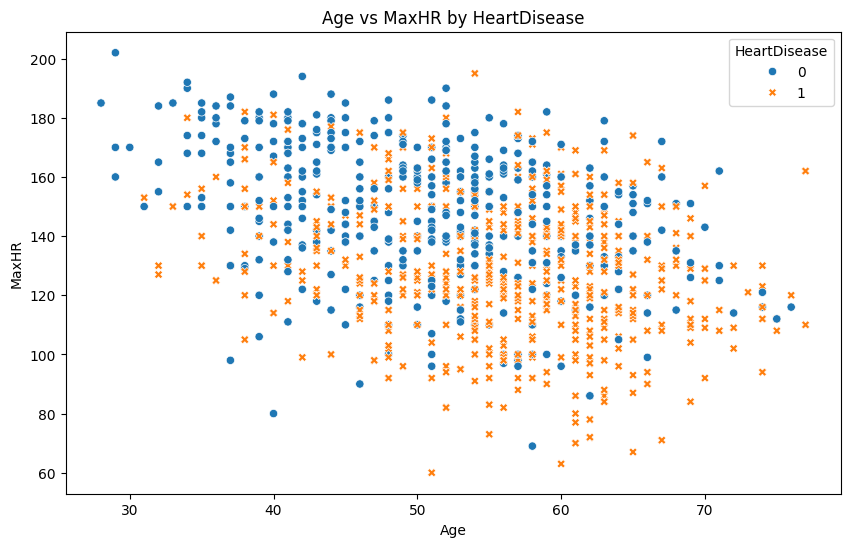

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', style='HeartDisease')
plt.title('Age vs MaxHR by HeartDisease')

## Preprocessing of Data

Replacing zero with median value

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
for col in ['RestingBP', 'Cholesterol']:
    df[col] = df[col].replace(0, df[col][df[col] != 0].median())

# Encode Categorical Variables
# Identify categorical columns

In [39]:

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Define Features and Target

In [40]:

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale Numeric Features
# Identify numeric columns (original numeric features before encoding)

In [42]:

numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#Train Random Forest Classifier

In [43]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#  Make Predictions

In [44]:

y_pred = rf_model.predict(X_test)

# Evaluate Model

In [45]:

print("=== Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Model Evaluation ===
Accuracy: 0.8750
Precision: 0.8911
Recall: 0.8824
F1-Score: 0.8867

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# Confusion Matrix


Text(70.72222222222221, 0.5, 'Actual')

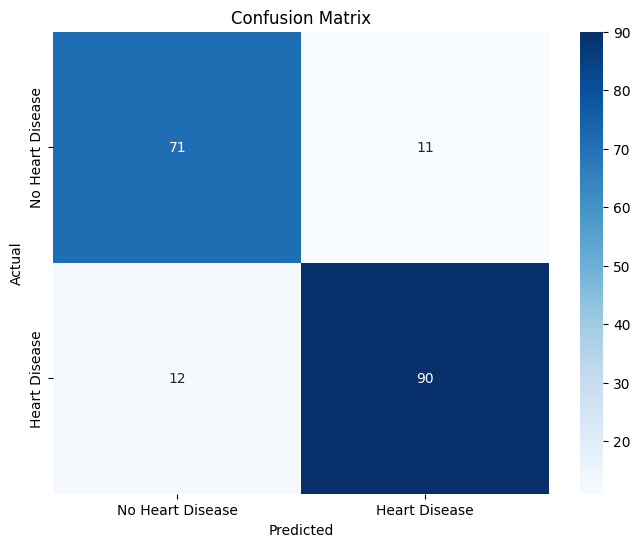

In [46]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
